In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('New_cars_cleaned.csv')
df.head()

,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)",...,Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire speed ratings/cons.type,Front tire rim size
0,40600.0,22.0,l4,FWD,5,4,3790.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
1,45500.0,22.0,l4,FWD,5,4,3829.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
2,43600.0,22.0,l4,FWD,5,4,3821.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,255,45.0,V,20.0
3,37400.0,22.0,l4,FWD,5,4,3783.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0
4,42600.0,21.0,l4,AWD,5,4,4026.0,104.0,108.3,64.2,...,NaN,NaN,50000.0,Acura,2019,SUV,235,55.0,H,19.0


## Cleaning the data

In [4]:
# checking the types of metadata
df.dtypes

MSRP                                    float64
EPA Fuel Economy Est - City (MPG)       float64
Engine                                   object
Drivetrain                               object
Passenger Capacity                        int64
Passenger Doors                           int64
Base Curb Weight (lbs)                  float64
Passenger Volume (ft³)                  float64
Wheelbase (in)                          float64
Track Width, Front (in)                 float64
Height, Overall (in)                    float64
Fuel Tank Capacity, Approx (gal)        float64
SAE Net Torque @ RPM                    float64
Fuel System                              object
SAE Net Horsepower @ RPM                float64
Displacement                            float64
Trans Description Cont.                  object
Trans Type                               object
Suspension Type - Front                  object
Suspension Type - Rear                   object
Air Bag-Frontal-Driver                  

In [5]:
# we remove all the categorical values 
dtf= df._get_numeric_data()
dtf


,MSRP,EPA Fuel Economy Est - City (MPG),Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",...,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Model year,Front tire aspect ratio,Front tire rim size
0,40600.0,22.0,5,4,3790.0,104.0,108.3,64.2,65.7,17.1,...,5.0,70000.0,6.0,39.0,NaN,NaN,50000.0,2019,55.0,19.0
1,45500.0,22.0,5,4,3829.0,104.0,108.3,64.2,65.7,17.1,...,5.0,70000.0,6.0,39.0,NaN,NaN,50000.0,2019,55.0,19.0
2,43600.0,22.0,5,4,3821.0,104.0,108.3,64.2,65.7,17.1,...,5.0,70000.0,6.0,39.0,NaN,NaN,50000.0,2019,45.0,20.0
3,37400.0,22.0,5,4,3783.0,104.0,108.3,64.2,65.7,17.1,...,5.0,70000.0,6.0,39.0,NaN,NaN,50000.0,2019,55.0,19.0
4,42600.0,21.0,5,4,4026.0,104.0,108.3,64.2,65.7,17.1,...,5.0,70000.0,6.0,39.0,NaN,NaN,50000.0,2019,55.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32311,45700.0,22.0,5,4,3920.0,93.0,109.2,62.1,NaN,NaN,...,12.0,50000.0,4.0,37.1,NaN,4.0,150000.0,2018,50.0,18.0
32312,41200.0,20.0,5,4,3602.0,93.0,109.3,62.1,NaN,NaN,...,12.0,50000.0,4.0,37.1,NaN,4.0,150000.0,2016,50.0,18.0
32313,44850.0,20.0,5,4,3602.0,93.0,109.3,62.1,NaN,NaN,...,12.0,50000.0,4.0,37.1,NaN,4.0,150000.0,2016,50.0,18.0
32314,41000.0,20.0,5,4,3602.0,93.0,109.3,62.1,NaN,NaN,...,12.0,50000.0,4.0,37.1,NaN,4.0,150000.0,2015,50.0,18.0


In [6]:
dtf.shape # we check the shape of our new dataset

(32316, 44)

In [7]:
dtf.dtypes # we confirm the types of metadata again

MSRP                                    float64
EPA Fuel Economy Est - City (MPG)       float64
Passenger Capacity                        int64
Passenger Doors                           int64
Base Curb Weight (lbs)                  float64
Passenger Volume (ft³)                  float64
Wheelbase (in)                          float64
Track Width, Front (in)                 float64
Height, Overall (in)                    float64
Fuel Tank Capacity, Approx (gal)        float64
SAE Net Torque @ RPM                    float64
SAE Net Horsepower @ RPM                float64
Displacement                            float64
Air Bag-Frontal-Driver                    int64
Air Bag-Frontal-Passenger                 int64
Air Bag-Passenger Switch (On/Off)         int64
Air Bag-Side Body-Front                   int64
Air Bag-Side Body-Rear                    int64
Air Bag-Side Head-Front                   int64
Air Bag-Side Head-Rear                    int64
Brakes-ABS                              

In [8]:
data = dtf.fillna(dtf.mean()) # we replace all null values with a mean due to a huge number of null values.
data.isna().sum()

MSRP                                    0
EPA Fuel Economy Est - City (MPG)       0
Passenger Capacity                      0
Passenger Doors                         0
Base Curb Weight (lbs)                  0
Passenger Volume (ft³)                  0
Wheelbase (in)                          0
Track Width, Front (in)                 0
Height, Overall (in)                    0
Fuel Tank Capacity, Approx (gal)        0
SAE Net Torque @ RPM                    0
SAE Net Horsepower @ RPM                0
Displacement                            0
Air Bag-Frontal-Driver                  0
Air Bag-Frontal-Passenger               0
Air Bag-Passenger Switch (On/Off)       0
Air Bag-Side Body-Front                 0
Air Bag-Side Body-Rear                  0
Air Bag-Side Head-Front                 0
Air Bag-Side Head-Rear                  0
Brakes-ABS                              0
Child Safety Rear Door Locks            0
Daytime Running Lights                  0
Traction Control                  

### Our data is finally ready for further analyis

### correlation

In [9]:
data.corr()

,MSRP,EPA Fuel Economy Est - City (MPG),Passenger Capacity,Passenger Doors,Base Curb Weight (lbs),Passenger Volume (ft³),Wheelbase (in),"Track Width, Front (in)","Height, Overall (in)","Fuel Tank Capacity, Approx (gal)",...,Corrosion Years,Drivetrain Miles/km,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Stabilizer Bar Diameter - Front (in),Roadside Assistance Years,Roadside Assistance Miles/km,Model year,Front tire aspect ratio,Front tire rim size
MSRP,1.000000,-0.298271,0.019730,0.037097,0.417161,-0.035817,0.051659,0.295912,-6.918473e-02,5.088948e-02,...,0.087354,0.147999,-0.160367,0.075273,9.752289e-02,1.229149e-01,0.131989,0.245464,-0.390432,0.499452
EPA Fuel Economy Est - City (MPG),-0.298271,1.000000,-0.096987,0.089905,-0.527953,-0.179415,-0.381628,-0.364344,-2.479288e-01,-3.131255e-01,...,0.102319,-0.037004,0.163367,-0.360675,-3.464151e-01,-1.014992e-01,0.039129,0.089155,-0.104588,-0.325898
Passenger Capacity,0.019730,-0.096987,1.000000,0.659035,0.187138,0.348492,0.179690,0.226639,2.405458e-01,1.702447e-01,...,-0.070794,0.028855,0.038559,0.150512,1.018257e-01,-3.980299e-03,-0.002128,0.396185,0.160850,0.066604
Passenger Doors,0.037097,0.089905,0.659035,1.000000,0.113849,0.231081,-0.043874,0.123698,-3.900206e-03,-8.155423e-02,...,-0.039158,0.036445,0.139891,-0.073359,-9.609276e-02,1.027534e-02,0.062822,0.470719,-0.042246,0.056816
Base Curb Weight (lbs),0.417161,-0.527953,0.187138,0.113849,1.000000,0.500037,0.243656,0.712701,1.066634e-01,1.340520e-01,...,-0.004645,0.020293,-0.125284,0.238245,2.236421e-01,1.382442e-01,0.104171,0.113695,-0.059523,0.444198
Passenger Volume (ft³),-0.035817,-0.179415,0.348492,0.231081,0.500037,1.000000,0.160311,0.568985,2.391098e-01,8.634206e-02,...,-0.161247,0.032772,0.073323,0.118949,3.928469e-02,-1.939830e-02,-0.037033,0.071143,0.205997,0.105640
Wheelbase (in),0.051659,-0.381628,0.179690,-0.043874,0.243656,0.160311,1.000000,0.244653,5.575550e-01,6.209752e-01,...,-0.246882,0.073736,-0.173078,0.886586,4.631693e-01,1.426952e-02,-0.142621,0.053583,0.505439,0.131576
"Track Width, Front (in)",0.295912,-0.364344,0.226639,0.123698,0.712701,0.568985,0.244653,1.000000,1.279935e-01,1.093646e-01,...,-0.051155,0.076447,-0.026187,0.222829,1.847180e-01,3.922376e-02,0.027304,0.277827,-0.042008,0.475360
"Height, Overall (in)",-0.069185,-0.247929,0.240546,-0.003900,0.106663,0.239110,0.557555,0.127994,1.000000e+00,7.753779e-01,...,-0.258504,0.022956,-0.053408,0.523525,3.797604e-01,1.389432e-15,-0.251422,-0.031038,0.534857,-0.008611
"Fuel Tank Capacity, Approx (gal)",0.050889,-0.313125,0.170245,-0.081554,0.134052,0.086342,0.620975,0.109365,7.753779e-01,1.000000e+00,...,-0.171032,0.063590,-0.102429,0.598562,4.383430e-01,-4.641350e-16,-0.193726,-0.085750,0.424000,0.078124


Text(0.5, 1.0, 'Correlations')

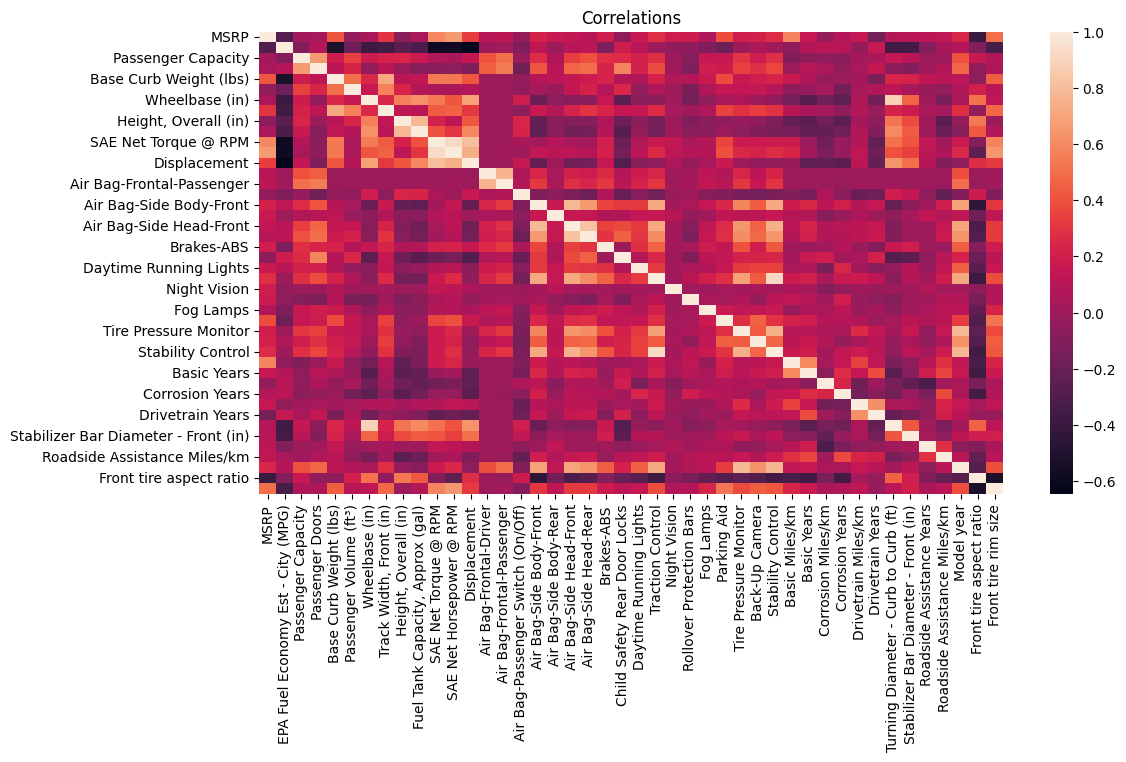

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr()).set_title('Correlations')

## Modelling

In [11]:
import numpy as np
X=np.asanyarray(data.drop('MSRP', axis=1))
y=np.asanyarray(data[['MSRP']])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.1, random_state=5)

In [13]:
print('train_X:', X_train.shape)
print('X_test:',X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

train_X: (29084, 43)
X_test: (3232, 43)
y_train: (29084, 1)
y_test: (3232, 1)


## import Dependencies

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [22]:
pipeline={'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
          'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
          'ab':make_pipeline(AdaBoostRegressor(random_state=1234)),
          'ridge':make_pipeline(Ridge(random_state=1234)),
          'lasso':make_pipeline(Lasso(random_state=1234)),
          'enet':make_pipeline(ElasticNet(random_state=1234)), }

In [23]:
# hyperparameters
hypergrid={'rf': {'randomforestregressor__min_samples_split':[2,4,6], 'randomforestregressor__min_samples_leaf':[1,2,3]},
           
           'gb':{ 'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},

           'ab':{'adaboostregressor__n_estimators':[50]},

           'ridge':{'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},
           
           'lasso':{'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},
           'enet':{'enet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},}

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
fit_models= {}
for algorithms, pipeline in pipeline.items():
    model=GridSearchCV(pipeline, hypergrid[algorithms], cv=10, n_jobs=-1)
    
    try:
        print('Start Training For {}.'.format(algorithms))
        model.fit(X_train, y_train)
        fit_models[algorithms]=model
        print('{} has been successfully fit.'.format(algorithms))

    except NotFittedError as e:
        print(repr(e))

Start Training For rf.


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


rf has been successfully fit.
Start Training For gb.


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Lo

gb has been successfully fit.
Start Training For ab.


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ab has been successfully fit.
Start Training For ridge.
ridge has been successfully fit.
Start Training For lasso.
lasso has been successfully fit.
Start Training For enet.


ValueError: Invalid parameter 'enet' for estimator Pipeline(steps=[('elasticnet', ElasticNet(random_state=1234))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [31]:
fit_models['ridge'].predict(X_test)

array([[13379.08764211],
       [23093.26449561],
       [23240.6747942 ],
       ...,
       [22204.85779807],
       [38230.70549398],
       [44858.59753111]])

In [32]:
fit_models['gb'].predict(X_test)

array([20082.91916919, 25267.13605696, 23382.84289584, ...,
       22090.30702729, 31214.81060778, 45770.67051669])

## Evaluation

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error


In [27]:
for algorithms, model in fit_models.items():
    y_hat=model.predict(X_test)
    print('{} scores-R2:{} MAE:{}'.format(algorithms, r2_score(y_test, y_hat), mean_absolute_error(y_hat, y_test)))

rf scores-R2:0.9643534664675653 MAE:1807.877493393162
gb scores-R2:0.9284232630605437 MAE:4403.305411123983
ab scores-R2:0.2431459580446692 MAE:25408.570652642407
ridge scores-R2:0.7388893814124038 MAE:8465.98470397463
lasso scores-R2:0.7389053906103653 MAE:8465.026403060936


In [33]:
best_models=fit_models['rf']
best_models

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=1234))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__min_samples_leaf': [1, 2, 3],
                         'randomforestregressor__min_samples_split': [2, 4, 6]})

## Deployment

### Importing Dependencies

In [38]:
! pip install -U ibm-watson-machine-learning

  ERROR: Error [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software while executing command python setup.py egg_info

  Using cached ibm_watson_machine_learning-1.0.359-py3-none-any.whl.metadata (4.0 kB)
  Using cached pandas-2.1.4-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached lomond-0.3.3-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached ibm-cos-sdk-2.13.5.tar.gz (58 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'



ERROR: Could not install packages due to an OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from ibm_watson_machine_learning import APIClient

ModuleNotFoundError: No module named 'ibm_watson_machine_learning'